# **Basic Set up**

In [1]:
!pip install scikit-plot

In [2]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [4]:
#load the models first

yaml_file = open('seq2seq_model.yml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'val_loss': [1.8679126501083374, 1.683219313621521, 1.5594372749328613, 1.436958909034729, 1.3456411361694336, 1.2822858095169067, 1.2343050241470337, 1.1986547708511353, 1.1709001064300537, 1.146751880645752, 1.1264170408248901, 1.1086647510528564, 1.092551589012146, 1.0778032541275024, 1.0642884969711304, 1.05225670337677, 1.040783166885376, 1.0289943218231201, 1.0179498195648193, 1.0063612461090088, 0.9958005547523499, 0.984406590461731, 0.9745944738388062, 0.9649500846862793, 0.956599235534668], 'val_accuracy': [0.5788846611976624, 0.6537011861801147, 0.6626413464546204, 0.7094401717185974, 0.7222288846969604, 0.7263397574424744, 0.7381649017333984, 0.7439576983451843, 0.7482510209083557, 0.7521452307701111, 0.7547280788421631, 0.757795512676239, 0.7601616978645325, 0.762140154838562, 0.7657321691513062, 0.7686570882797241, 0.7702820301055908, 0.7723289132118225, 0.7750428915023804, 0.7767990231513977, 0.7784923911094666, 0.780778706073761, 0.783247530460357

In [5]:
#load the models first

bin_yaml_file = open('binary_model.yml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary_model.h5")
print("Loaded model from disk")

with open("binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.6955633163452148, 0.693571150302887, 0.6931900978088379, 0.6931365132331848, 0.6931370496749878, 0.6931132674217224, 0.6932304501533508, 0.6931248903274536, 0.6931012868881226, 0.6930618286132812, 0.6931273937225342, 0.6930752992630005, 0.6931127905845642, 0.6930372714996338, 0.6930662989616394, 0.6930922269821167, 0.6930111646652222, 0.6930456757545471, 0.6930471658706665, 0.6930334568023682, 0.6930854320526123, 0.6930512189865112, 0.6930564045906067, 0.6931026577949524, 0.6930333375930786], 'val_loss': [0.6931050419807434, 0.693141520023346, 0.6931397914886475, 0.6931555271148682, 0.693130373954773, 0.6931431889533997, 0.6933592557907104, 0.6930980086326599, 0.6931357383728027, 0.6932877898216248, 0.6931679844856262, 0.6932668089866638, 0.6931980848312378, 0.6934177279472351, 0.6933497786521912, 0.6933238506317139, 0.6932784914970398, 0.6933419108390808, 0.6933525800704956, 0.6933664679527283, 0.6933069229125977, 0.6931163668632507, 0.69325530529022

In [6]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

1000
1000


In [8]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

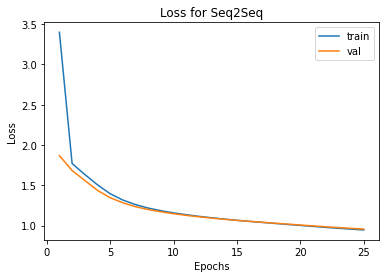

In [9]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

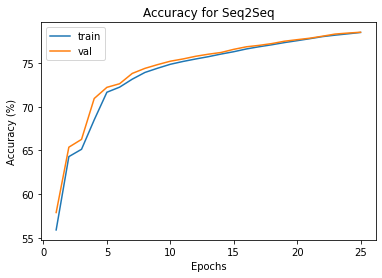

In [10]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [11]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 485, 1: 515}


In [12]:
y_pred

array([[0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.51364344],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.5048499 ],
       [0.504

Text(0.5, 1.0, 'Loss for Binary Classifier')

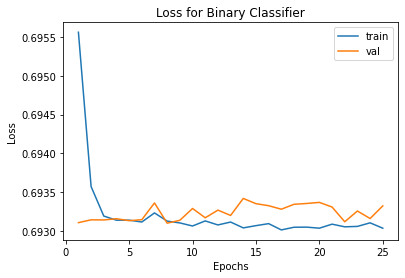

In [13]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

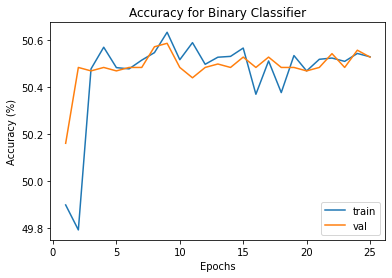

In [14]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

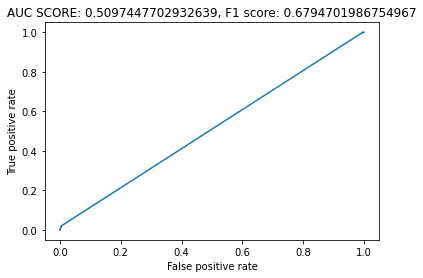

In [15]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

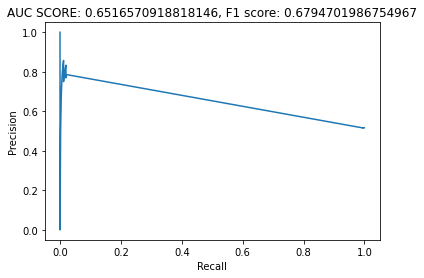

In [16]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

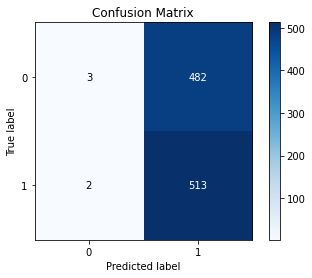

In [17]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()